In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc

In [7]:
def initialize_pos_vel(box_l, density):
    initpos=np.arange(0,box_l,1/density)
    initvel=np.zeros(int(box_l*density))
    return initpos,initvel

In [11]:
########################################
## Calculates net forces on each particles and returns list of net forces for particles (list_f)
########################################
def calc_netforce(initpos):
    list_f=np.zeros_like(initpos)
    for i in range(len(initpos)):
        r=initpos-initpos[i]
        r=r[r!=0]
        f=G*(m**2)*r/(abs(r**3))
        list_f[i]=np.sum(f)
    return(list_f)

In [4]:
########################################
## Calculates the new velocity and position
########################################
def vel_next(a,vi,dt):
    vf=vi+a*dt
    return vf

def pos_next(a,vi,xi,dt):
    xf=xi+(vi*dt)+(.5*a*dt**2)
    return xf

def eval_step(initpos, initvel):
    list_f=calc_netforce(initpos)
    nextpos=pos_next(list_f/m,initvel,initpos,dt)
    nextvel=vel_next(list_f/m,initvel,dt)
    return(nextpos,nextvel)
    

In [8]:
########################################
## Initiialiszing constants and Lists that will be used
########################################

G=6.67e-11
G=1
m=1
box_l=10
density= .5
box_area=box_l**2
dt=.5
initpos,initvel=initialize_pos_vel(box_l, density)

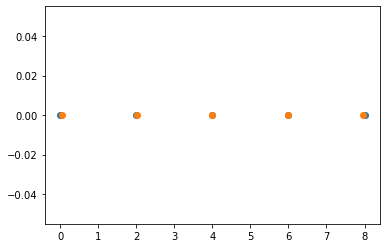

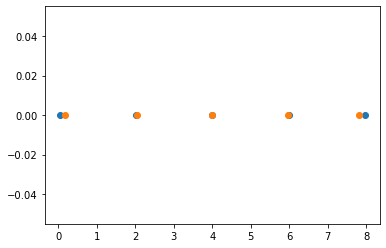

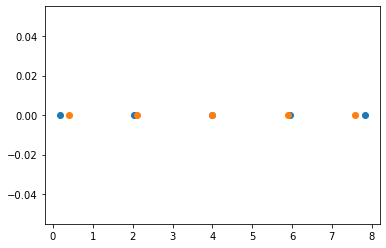

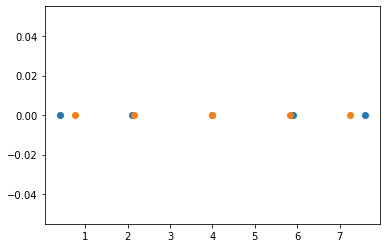

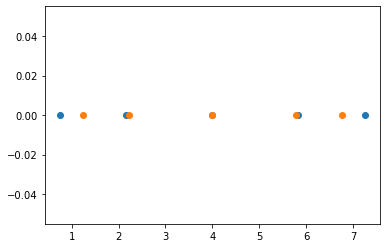

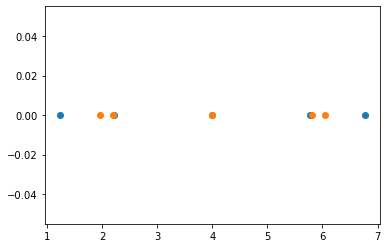

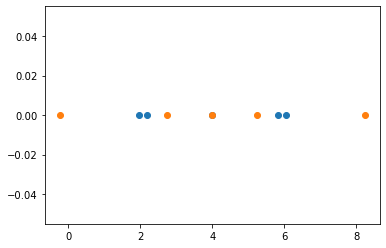

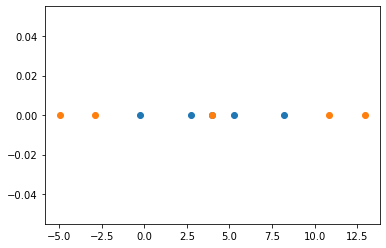

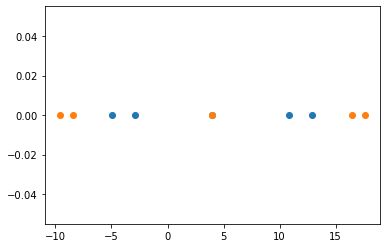

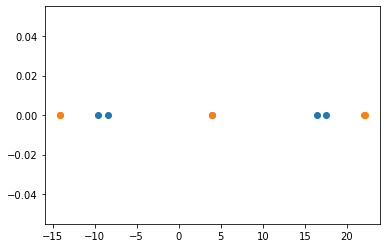

In [12]:

for t in range(10):
    plt.scatter(initpos, np.zeros_like(initpos))
    initpos, initvel=eval_step(initpos,initvel)
    plt.scatter(initpos, np.zeros_like(initpos))
    #plt.xlim([-25,25])
    plt.show()